In [ ]:
from google.colab import files
uploaded = files.upload()



Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
sns.set()

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


I copied the training data and dropped the Id column since it's just a unique identifier and not useful for prediction. Then I checked the first few rows to make sure the data looks fine.

In [ ]:
df = train_df.copy()
df = df.drop('Id', axis=1) #ID makes no sense for our future analysis
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info() #We can inspect the types of feature columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


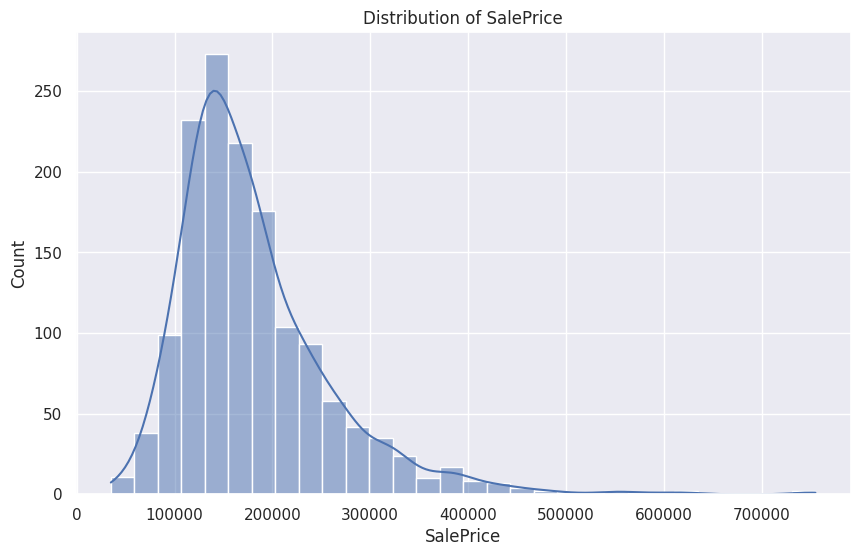

In [ ]:
# Let's visualize the distribution of the target variable 'SalePrice'
# This helps us understand skewness, potential outliers, and overall spread
print(df['SalePrice'].describe())

plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.show()

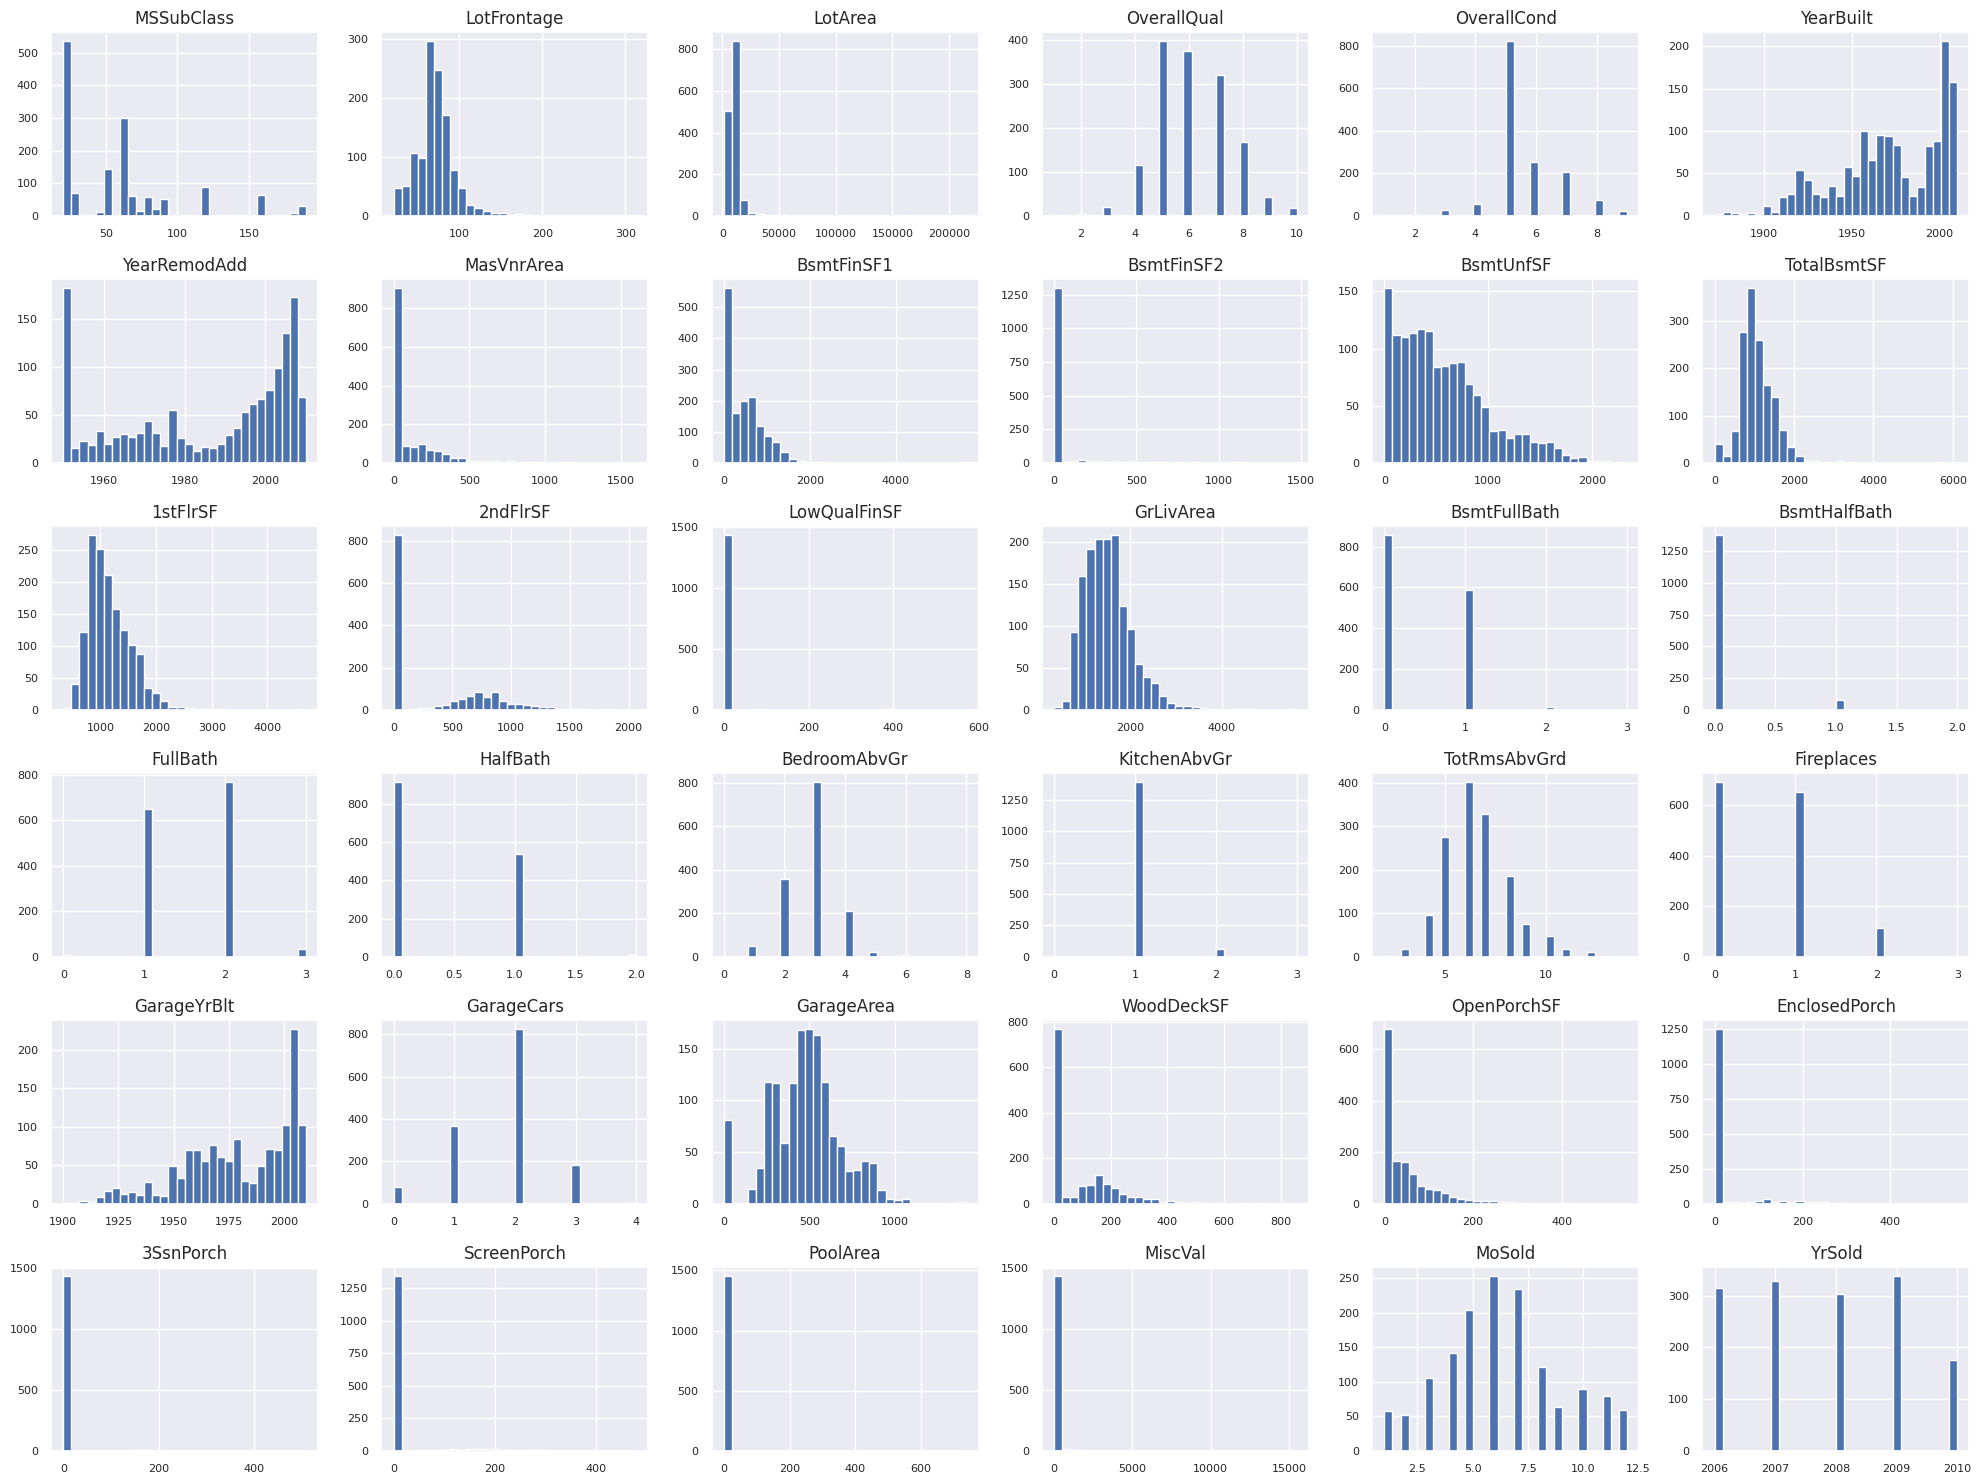

In [ ]:
# Select all numerical columns except the target
num_df = df.select_dtypes(include=['int64', 'float64']).drop('SalePrice', axis=1)

# Plot histograms for each numerical feature
num_df.hist(bins=30, figsize=(20, 15), xlabelsize= 8, ylabelsize= 8)
plt.tight_layout()
plt.show()

In [ ]:
# Count missing values in each column
missing_v = df.isnull().sum()

# Filter only columns with at least one missing value and sort them descending
missing_v[missing_v > 0].sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [ ]:
# Drop columns with a high percentage of missing values or low predictive power
df = df.drop(columns=["Alley", "PoolQC", "Fence", "MiscFeature"])

# Select numerical features (excluding the target 'SalePrice') and categorical features
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('SalePrice')
cat_cols = df.select_dtypes(include=['object']).columns

In [ ]:
from sklearn.impute import SimpleImputer

# Create imputers: one for numerical (median), one for categorical (fill with 'Unknown')
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')

# Apply imputers to the corresponding columns and overwrite missing values
df[num_cols] = pd.DataFrame(num_imputer.fit_transform(df[num_cols]), columns=num_cols, index= df.index)
df[cat_cols] = pd.DataFrame(cat_imputer.fit_transform(df[cat_cols]), columns=cat_cols, index= df.index)

In [ ]:
# Print the number of unique categories for each categorical feature (cardinality)
# Helps decide whether One-Hot Encoding is appropriate
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

MSZoning: 5 unique values
Street: 2 unique values
LotShape: 4 unique values
LandContour: 4 unique values
Utilities: 2 unique values
LotConfig: 5 unique values
LandSlope: 3 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 8 unique values
BldgType: 5 unique values
HouseStyle: 8 unique values
RoofStyle: 6 unique values
RoofMatl: 8 unique values
Exterior1st: 15 unique values
Exterior2nd: 16 unique values
MasVnrType: 4 unique values
ExterQual: 4 unique values
ExterCond: 5 unique values
Foundation: 6 unique values
BsmtQual: 5 unique values
BsmtCond: 5 unique values
BsmtExposure: 5 unique values
BsmtFinType1: 7 unique values
BsmtFinType2: 7 unique values
Heating: 6 unique values
HeatingQC: 5 unique values
CentralAir: 2 unique values
Electrical: 6 unique values
KitchenQual: 4 unique values
Functional: 7 unique values
FireplaceQu: 6 unique values
GarageType: 7 unique values
GarageFinish: 4 unique values
GarageQual: 6 unique values
GarageCond: 6 unique values


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit encoder on categorical columns and transform them into one-hot encoded array
cat_encoded = ohe.fit_transform(df[cat_cols])
encoded_cols = ohe.get_feature_names_out(cat_cols) # Get the names of the new one-hot encoded columns
df_cat_encoded = pd.DataFrame(cat_encoded, columns = encoded_cols, index=df.index) # Create a DataFrame from the encoded array, using the original index

# Concatenate numerical and encoded categorical features into a final dataset
df_final = pd.concat([df[num_cols], df_cat_encoded], axis=1)

print(df_final.shape)
df_final.head()

(1460, 286)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Define features (X) and apply log-transform to the target variable (y)
X = df_final
y = np.log(df['SalePrice'])

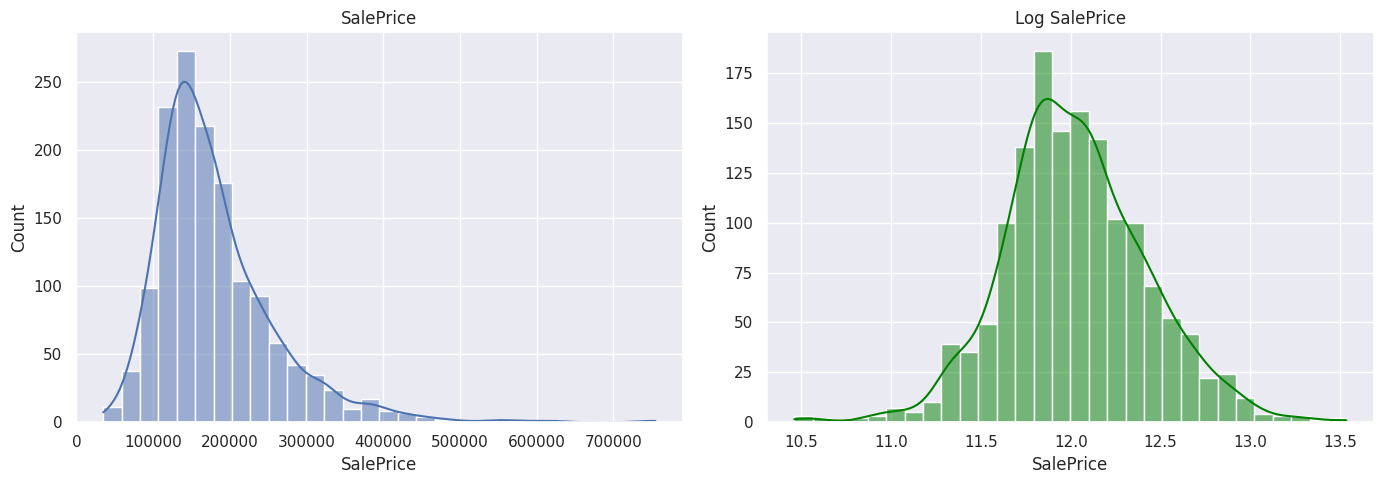

In [ ]:
# Compare original vs log-transformed target distribution
plt.figure(figsize=(14, 5))

# Plot original SalePrice
plt.subplot(1, 2, 1)
sns.histplot(df["SalePrice"], kde=True, bins=30)
plt.title("SalePrice")

# Plot log-transformed SalePrice
plt.subplot(1, 2, 2)
sns.histplot(y, kde=True, bins=30, color='green')
plt.title("Log SalePrice")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define grid of hyperparameters
n_estimators_list = [30, 50, 100, 150]
max_depth_list = [5, 10, 15, 20]

# Define a reusable evaluation function based on RMSLE
def evaluate_model_rmsle(X_train, X_val, y_train, y_val, n_estimators, max_depth):
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42
    )

    # Train the model
    model.fit(X_train, y_train)

    # Predict and reverse log transformation
    y_pred_log = model.predict(X_val)
    y_pred = np.exp(y_pred_log)
    y_val_true = np.exp(y_val)

    # Calculate Root Mean Squared Log Error
    rmsle = np.sqrt(mean_squared_log_error(y_val_true, y_pred))
    return rmsle

In [ ]:
results = []

# Grid search: iterate over combinations of estimators and tree depth
for n in n_estimators_list:
    for d in max_depth_list:
        rmsle = evaluate_model_rmsle(X_train, X_val, y_train, y_val, n_estimators=n, max_depth=d)
        results.append({
            'n_estimators': n,
            'max_depth': d,
            'rmsle': rmsle
        })
        print(f"n={n}, depth={d} → RMSLE: {rmsle:.4f}")

n=30, depth=5 → RMSLE: 0.1641
n=30, depth=10 → RMSLE: 0.1457
n=30, depth=15 → RMSLE: 0.1509
n=30, depth=20 → RMSLE: 0.1521
n=50, depth=5 → RMSLE: 0.1642
n=50, depth=10 → RMSLE: 0.1471
n=50, depth=15 → RMSLE: 0.1486
n=50, depth=20 → RMSLE: 0.1496
n=100, depth=5 → RMSLE: 0.1632
n=100, depth=10 → RMSLE: 0.1446
n=100, depth=15 → RMSLE: 0.1451
n=100, depth=20 → RMSLE: 0.1454
n=150, depth=5 → RMSLE: 0.1623
n=150, depth=10 → RMSLE: 0.1447
n=150, depth=15 → RMSLE: 0.1447
n=150, depth=20 → RMSLE: 0.1450


In [ ]:
# After evaluating all combinations of n_estimators and max_depth,
# we select the model with the lowest RMSLE score.

results_df = pd.DataFrame(results)
best = results_df.loc[results_df['rmsle'].idxmin()]
print("\n Best Model:")
print(best)


 Best Model:
n_estimators    100.000000
max_depth        10.000000
rmsle             0.144598
Name: 9, dtype: float64


In [ ]:
final_model =  RandomForestRegressor(n_estimators=100, max_depth =10, random_state =42)
final_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
# Load test dataset for final predictions
test_df = pd.read_csv("test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Make a copy of the test data and drop columns with too many missing values
df_test_processed = test_df.copy()
df_test_processed = df_test_processed.drop(columns=["Id", "Alley", "PoolQC", "Fence", "MiscFeature"])

# Impute missing numerical values using median strategy
df_test_processed[num_cols] = pd.DataFrame(
    num_imputer.transform(df_test_processed[num_cols]),
    columns=num_cols,
    index=df_test_processed.index
)

# Impute missing categorical values using 'Unknown'
df_test_processed[cat_cols] = pd.DataFrame(
    cat_imputer.transform(df_test_processed[cat_cols]),
    columns=cat_cols,
    index=df_test_processed.index
)

# Apply One-Hot Encoding to categorical columns
cat_encoded_test = ohe.transform(df_test_processed[cat_cols])
df_cat_encoded_test = pd.DataFrame(cat_encoded_test, columns=encoded_cols, index=df_test_processed.index)

# Combine numerical and encoded categorical features into final test set
df_test_final = pd.concat([df_test_processed[num_cols], df_cat_encoded_test], axis=1)

df_test_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Check the shape of our training and testing datasets
print(df_final.shape)
print(df_test_final.shape)


(1460, 286)
(1459, 286)


In [ ]:
y_test_pred_log = final_model.predict(df_test_final)
y_test_pred = np.exp(y_test_pred_log) # Convert predictions back from log scale to original scale
y_test_pred

array([127202.90065208, 154182.40775493, 176408.64608801, ...,
       152930.66200617, 115506.80598884, 227096.55639498])

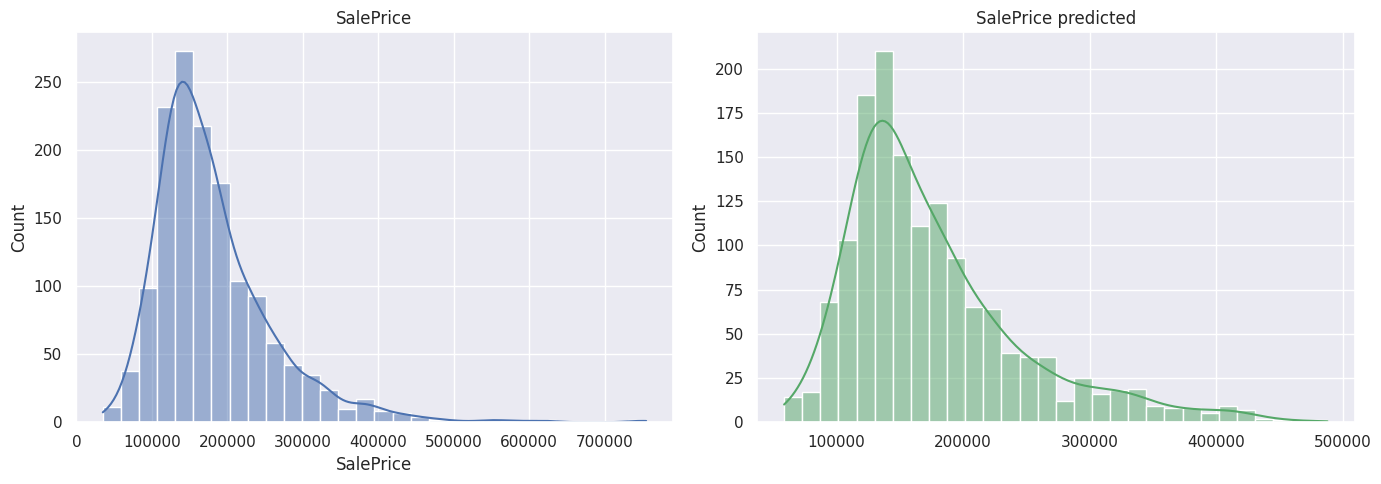

In [ ]:
# Plot original vs predicted SalePrice distributions
plt.figure(figsize=(14, 5))

# Left plot: original SalePrice distribution from training data
plt.subplot(1, 2, 1)
sns.histplot(df["SalePrice"], kde=True, bins=30)
plt.title("SalePrice")

# Right plot: predicted SalePrice distribution from test data
plt.subplot(1, 2, 2)
sns.histplot(y_test_pred, kde=True, bins=30, color='g')
plt.title("SalePrice predicted")

plt.tight_layout()
plt.show()

In [ ]:
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": y_test_pred
})

submission.to_csv("submission.csv", index=False)

submission.head()

,Id,SalePrice
0,1461,127202.900652
1,1462,154182.407755
2,1463,176408.646088
3,1464,182564.983961
4,1465,197526.756655
